题目一：使用sklearn处理wine数据集
wine数据集是和酒有关的数据集。wine数据集包含3种不同起源的葡萄酒的记录共178条。一共有14列，其中，第一个属性是类标识符，分别是1/2/3来表示，代表葡萄酒的三个分类。后面的13列对应葡萄酒的每种化学成分，分别是：酒精、苹果酸、灰、灰分的碱度、镁、总酚、黄酮类化合物、非黄烷类酚类、原花色素、颜色强度、色调、稀释葡萄酒的OD280/OD315、脯氨酸。其中第1类有59个样本，第2类有71个样本，第3类有48个样本。

PCA降维前wine测试集数据的形状为： (142, 13)
PCA降维后wine测试集数据的形状为： (142, 2)


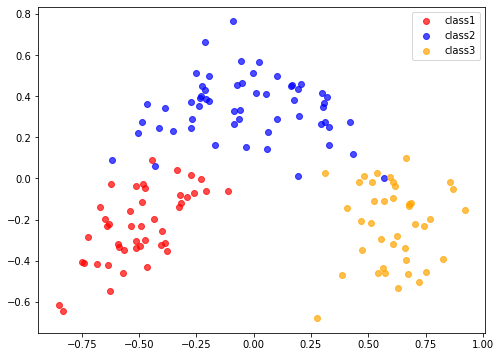

In [2]:
import pandas as pd
#使用pandas库读取wine数据集；
wine = pd.read_csv('./wine.csv', encoding='gb18030')
#wine.head()

#将wine数据集数据和标签拆分开；
wine_data = wine.iloc [:,1:14]
wine_lable = wine.iloc[:,0]
#print('wine数据集的标签为：',wine_lable)

#将wine数据集划分为训练集和测试集；
from sklearn.model_selection import train_test_split
#random_state为一个固定值是划分得到的结果一致
wine_train, wine_test, wine_train_label, wine_test_label = train_test_split(wine_data, wine_lable, test_size=0.2, random_state=42)
wine_train_label.to_csv('./wine_train_label.csv', index=False)
wine_test_label.to_csv('./wine_test_label.csv', index=False)
# print('wine原始数据集的形状为：',wine_data.shape)
# print('wine训练数据集的形状为：',wine_train.shape)
# print('wine测试数据集的形状为：',wine_test.shape)

In [ ]:
#标准化wine数据集；
#标准化wine训练数据集；
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler().fit(wine_train)#生成规则
wine_train_scaler = Scaler.transform(wine_train)
#将wine_train_scaler转为DataFrame
wine_train_scaler = pd.DataFrame(wine_train_scaler)
#重命名wine_train_scaler
wine_train_scaler.columns = wine_train.columns
wine_train_scaler.to_csv('./wine_train_scaler.csv', index=False)
#print('离差标准化后wine训练集前五行的数据为：\n', wine_train_scaler.head())

#标准化wine测试数据集；
# 归一化处理
scaler = MinMaxScaler().fit(wine_test)#生成规则
wine_test_scaler = scaler.transform(wine_test)
#将wine_test_scaler转为DataFrame
wine_test_scaler = pd.DataFrame(wine_test_scaler)

#重命名wine_train_scaler
wine_test_scaler.columns = wine_test.columns
wine_test_scaler.to_csv('./wine_test_scaler.csv', index=False)
#print('离差标准化后wine测试集前五行的数据为：\n', wine_test_scaler.head())

In [ ]:
#对wine数据集进行PCA降维，并可视化展示。
from sklearn.decomposition import PCA
model = PCA(n_components=2, random_state=42)
X_transform = model.fit_transform(wine_train_scaler)
print('PCA降维前wine测试集数据的形状为：', wine_train_scaler.shape)
print('PCA降维后wine测试集数据的形状为：', X_transform.shape)

#降维结果可视化
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
colors = ['', 'red', 'blue', 'orange']
for i in [1, 2, 3]:
    plt.scatter(X_transform[wine_train_label == i, 0], X_transform[wine_train_label == i, 1], alpha=0.7, c=colors[i], label="class{}".format(i))
plt.legend()
plt.show()

题目二：构建基于wine数据集的K-Means聚类模型

In [10]:
# 根据题目一的wine数据集处理的结果，构建聚类数目为3的K-Means模型；
from sklearn.cluster import KMeans #导入分类器库
wine_train_label.columns = ['label']#重命名列名
#构建并训练模型
kmeans = KMeans(n_clusters = 3, random_state=123).fit(wine_train_scaler)
print("构建K-means模型为", kmeans)
# 在聚类数目为2至10类之间，根据相应的SSE、FMI和Calinski-Harabasz指数评价模型，并绘制图形；
# 综合上述指标，确定最优聚类数目。


构建K-means模型为 KMeans(n_clusters=3, random_state=123)


wine数据聚为2类， 其中silhouettteScore指数为：0.29176890779063896
wine数据聚为3类， 其中silhouettteScore指数为：0.29108592627975066
wine数据聚为4类， 其中silhouettteScore指数为：0.2566899800138515
wine数据聚为5类， 其中silhouettteScore指数为：0.21488633034620439
wine数据聚为6类， 其中silhouettteScore指数为：0.2213689500228613
wine数据聚为7类， 其中silhouettteScore指数为：0.2199233577686602
wine数据聚为8类， 其中silhouettteScore指数为：0.15754099287243456
wine数据聚为9类， 其中silhouettteScore指数为：0.15615853737263277
wine数据聚为10类， 其中silhouettteScore指数为：0.14522347183157236


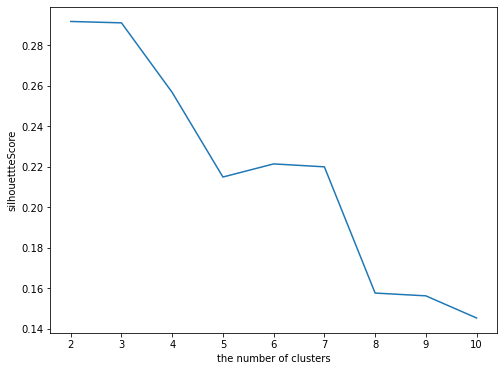

In [4]:
# 在聚类数目为2至10类之间，求取模型的轮廓系数，绘制轮廓系数折线图；
# (b-a)/max(a, b)
# 轮廓系数的区间为：[-1, 1]。 -1代表分类效果差，1代表分类效果好。0代表聚类重叠，没有很好的划分聚类。
from sklearn.metrics import silhouette_score
silhouettteScore = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state=123).fit(wine_train_scaler)
    score = silhouette_score(wine_train_scaler, kmeans.labels_)
    print("wine数据聚为{}类， 其中silhouettteScore指数为：{}".format(i, score))
    silhouettteScore.append(score)
plt.figure(figsize=(8,6))
plt.plot(range(2, 11), silhouettteScore, linewidth=1.5, linestyle='-')
plt.xlabel("the number of clusters")
plt.ylabel("silhouettteScore")
plt.show()

wine数据聚为2类， 其中SSE指数为：54.75302382348468
wine数据聚为3类， 其中SSE指数为：42.065475856579006
wine数据聚为4类， 其中SSE指数为：38.13620149168885
wine数据聚为5类， 其中SSE指数为：36.038808704992185
wine数据聚为6类， 其中SSE指数为：33.53184422677264
wine数据聚为7类， 其中SSE指数为：31.635771184977013
wine数据聚为8类， 其中SSE指数为：30.167766194011225
wine数据聚为9类， 其中SSE指数为：28.693086938660333
wine数据聚为10类， 其中SSE指数为：27.684203696325802


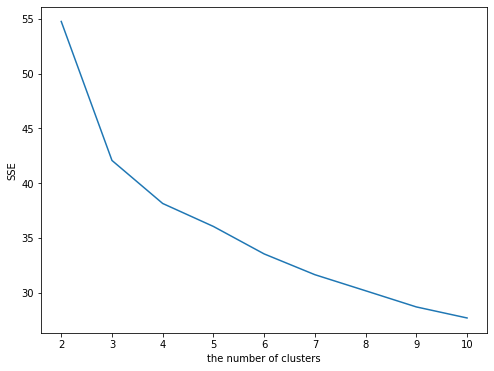

In [5]:
#导入SSE方法的评价函数
# 簇内误方差（SSE）
sse_score_list = []
for i in range(2, 11):
    #构建并训练模型
    kmeans = KMeans(n_clusters = i, random_state=123).fit(wine_train_scaler)
    score = kmeans.inertia_
    print("wine数据聚为{}类， 其中SSE指数为：{}".format(i, score))
    sse_score_list.append(score)
plt.figure(figsize=(8,6))
plt.plot(range(2, 11), sse_score_list, linewidth=1.5, linestyle='-')
plt.xlabel("the number of clusters")
plt.ylabel("SSE")
plt.show()

wine数据聚为2类， 其中FMI指数为：0.6372708201875603
wine数据聚为3类， 其中FMI指数为：0.9015787742958165
wine数据聚为4类， 其中FMI指数为：0.8099731352526389
wine数据聚为5类， 其中FMI指数为：0.750412410146337
wine数据聚为6类， 其中FMI指数为：0.7159384846439321
wine数据聚为7类， 其中FMI指数为：0.6866843301765126
wine数据聚为8类， 其中FMI指数为：0.5974048355349032
wine数据聚为9类， 其中FMI指数为：0.5768373095624272
wine数据聚为10类， 其中FMI指数为：0.5213987216837689


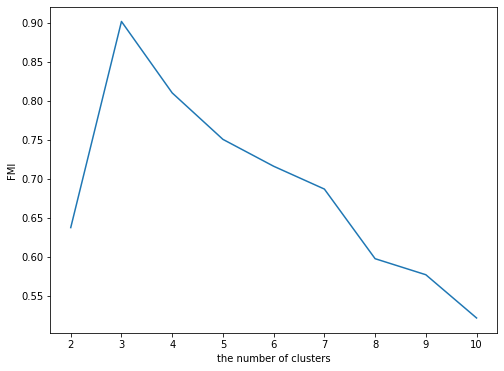

In [6]:
# 导入FMI方法的评价函数
# FMI是对聚类结果和真实值计算得到的召回率和精确率，进行几何平均的结果，取值范围为 [0,1]，越接近1越好。
from sklearn.metrics import fowlkes_mallows_score
fmi_score_list = []
for i in range(2, 11):
    #构建并训练模型
    kmeans = KMeans(n_clusters = i, random_state=123).fit(wine_train_scaler)
    score = fowlkes_mallows_score(wine_train_label, kmeans.labels_)
    print("wine数据聚为{}类， 其中FMI指数为：{}".format(i, score))
    fmi_score_list.append(score)
plt.figure(figsize=(8,6))
plt.plot(range(2, 11), fmi_score_list, linewidth=1.5, linestyle='-')
plt.xlabel("the number of clusters")
plt.ylabel("FMI")
plt.show()

wine数据聚为2类， 其中Calinski-Harabasz指数为：66.20557236615453
wine数据聚为3类， 其中Calinski-Harabasz指数为：63.74148635538573
wine数据聚为4类， 其中Calinski-Harabasz指数为：51.27491690220522
wine数据聚为5类， 其中Calinski-Harabasz指数为：42.39266889414345
wine数据聚为6类， 其中Calinski-Harabasz指数为：38.21719743146374
wine数据聚为7类， 其中Calinski-Harabasz指数为：34.85675366194537
wine数据聚为8类， 其中Calinski-Harabasz指数为：32.03051956435844
wine数据聚为9类， 其中Calinski-Harabasz指数为：30.101671952437407
wine数据聚为10类， 其中Calinski-Harabasz指数为：28.058115389592274


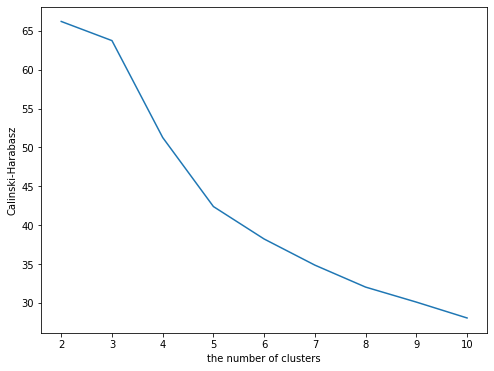

In [7]:
#导入Calinski-Harabasz方法的评价函数
from sklearn.metrics import calinski_harabasz_score
harabasz_score_list = []
for i in range(2, 11):
    #构建并训练模型
    kmeans = KMeans(n_clusters = i, random_state=123).fit(wine_train_scaler)
    score = calinski_harabasz_score(wine_train_scaler, kmeans.labels_)
    print("wine数据聚为{}类， 其中Calinski-Harabasz指数为：{}".format(i, score))
    harabasz_score_list.append(score)
plt.figure(figsize=(8,6))
plt.plot(range(2, 11), harabasz_score_list, linewidth=1.5, linestyle='-')
plt.xlabel("the number of clusters")
plt.ylabel("Calinski-Harabasz")
plt.show()

题目三：构建基于wine数据集的SVM分类模型
	
	读取wine数据集，区分标签和数据；
	将wine数据集划分为训练集和测试集；
	使用离差标准化方法标准化wine数据集；
	构建SVM模型，并预测测试集结果；
	打印出分类报告，并绘制各个类的Roc曲线，评价分类模型性能。


In [8]:
#建立SVM模型
from sklearn.svm import SVC
print("训练集形状：", wine_train_scaler.shape,'\n',"训练集标签形状", wine_train_label.shape, '\n', "测试集形状：", wine_test_scaler.shape,'\n',"测试集标签形状", wine_test_label.shape, '\n')
#后见SVM模型，并预测测试集结果
svm = SVC().fit(wine_train_scaler, wine_train_label.values.ravel())
print("建立的SVM模型为：", svm)
#SVM模型预测结果
wine_target_pred = svm.predict(wine_test_scaler)
print('测试集的预测结果为：\n', wine_target_pred)

训练集形状： (142, 13) 
 训练集标签形状 (142,) 
 测试集形状： (36, 13) 
 测试集标签形状 (36,) 

建立的SVM模型为： SVC()
测试集的预测结果为：
 [1 1 3 2 2 1 2 3 2 3 1 3 1 2 1 2 2 2 1 2 2 2 2 3 3 3 2 2 2 2 1 2 3 1 1 1]


SVM模型分类报告：
               precision    recall  f1-score   support

           1       1.00      0.79      0.88        14
           2       0.82      1.00      0.90        14
           3       1.00      1.00      1.00         8

    accuracy                           0.92        36
   macro avg       0.94      0.93      0.93        36
weighted avg       0.93      0.92      0.92        36

(36, 3)
(36, 3)


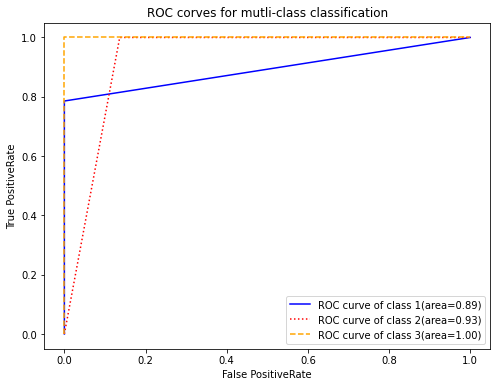

In [9]:
#评价评估
#预测报告
from sklearn.metrics import classification_report
#模型评估
print('SVM模型分类报告：\n', classification_report(wine_test_label, wine_target_pred))
#绘制每个类的Roc曲线
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
#将标签二值化
y_real = label_binarize(wine_test_label, classes=[1, 2, 3])
y_pred = label_binarize(wine_target_pred, classes=[1, 2, 3])
print(y_real.shape)
print(y_pred.shape)
#计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_real[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
#绘制
plt.figure(figsize=(8,6))
colors = ['blue', 'red', 'orange']
lines = ['-', ':', '--']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], linestyle=lines[i], label='ROC curve of class {0}(area={1:0.2f})'.format(i+1, roc_auc[i]))
plt.legend()
plt.xlabel("False PositiveRate")
plt.ylabel("True PositiveRate")
plt.title('ROC corves for mutli-class classification')
plt.show()